# Getting deeper with Keras
* Tensorflow is a powerful and flexible tool, but coding large neural architectures with it is tedious.
* There are plenty of deep learning toolkits that work on top of it like Slim, TFLearn, Sonnet, Keras.
* Choice is matter of taste and particular task
* We'll be using Keras

In [28]:
import numpy as np
import keras
import pandas as pd

In [2]:
def load_dataset():
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [83]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

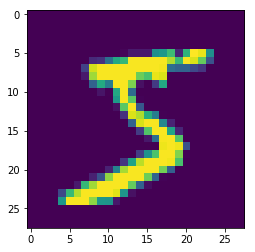

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0]);

### Task:
- Build NN using Keras with couple of layers with linear activation function
- Play with variout nonlinear activation functions
- Calculate loss on validation set and plot it for diffrent iterations for all architectures
- Try to normalize data
- Use regularization (L1, L2, Dropout)
- Optimize number of neurons, learning_rate, regularization coefficient and optimizer
- Try Batch Normalization
- Save and load trained model and weights

In [84]:
# type(X_train)
from sklearn.preprocessing import StandardScaler
# print(X_train.mean())
# print(X_val.shape)
scaler = StandardScaler()
scaler.fit(X_train.reshape(50000, 28*28))
X_train_scaled = scaler.transform(X_train.reshape(50000, 28*28))
X_test_scaled = scaler.transform(X_test.reshape((10000, 28*28)))
X_val_scaled = scaler.transform(X_val.reshape((10000, 28*28)))
# X_train_scaled = preprocessing.scale()
# X_train_scaled = preprocessing.scale(X_train.reshape(50000, 28*28))

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [85]:
feats_size = X_train_scaled.shape[1]
# df = pd.DataFrame(y_train)
# print(df[0].unique())
# df
# print(y_train.shape)

num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val =  keras.utils.to_categorical(y_val, num_classes)


### Sequential


In [108]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras import regularizers
    def create_model():
    print('Building model sequentially 1...')
    model = Sequential()
    model.add(Dense(784, input_shape=(feats_size,), kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))



Building model sequentially 1...


In [118]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [119]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
batch_size = 100
epochs = 5
# history = model.fit(X_train_scaled, y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_data=(X_val_scaled, y_val))
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x7f9416adbdd8> does not.

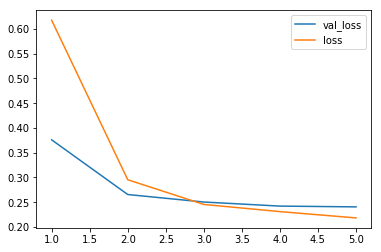

In [111]:

import matplotlib.pyplot as plt 
plt.plot(np.arange(1 , 6), history.history['val_loss'], label = 'val_loss')
plt.plot(np.arange(1 , 6), history.history['loss'], label = 'loss')
plt.legend()

In [112]:
score = model.evaluate(X_test_scaled, y_test,
                       batch_size=batch_size, verbose=1)
print('\n')
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 42us/step


Test score: 0.25880860432982444
Test accuracy: 0.963100004196167
